<a href="https://colab.research.google.com/github/ilmaaliyaf/learn-deep-learning/blob/master/P4_10117019_Analisis_Sentimen_Sederhana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Sentimen Sederhana
Oleh Ilma Aliya Fiddien (10117019)

---
> Akan dianalisis bagaimana sentimen para pengguna Twitter mengenai berita tentang pengumuman hasil seleksi `SNMPTN` pada tanggal 22 Maret 2021.

Analisis sentimen terhadap topik tersebut meliputi 
- pembobotan nilai sentimen (positif atau negatif) per tweet
- frekuensi kemunculan emoji dari seluruh tweet

Digunakan modul-modul bawaan python, modul pandas, dan regex.

In [ ]:
import pandas as pd

# Impor Kata Kamus Kata Negatif dan Kamus Kata Positif

Kamus sentimen kata diambil dari https://github.com/fajri91/InSet dengan referensi:

Fajri Koto, and Gemala Y. Rahmaningtyas "InSet Lexicon: Evaluation of a Word List for Indonesian Sentiment Analysis in Microblogs". IEEE in the 21st International Conference on Asian Language Processing (IALP), Singapore, December 2017.

- Setiap kata bersentimen positif diberikan nilai positif antara 1 hingga 5.
- Setiap kata bersentimen negatif diberikan nilai negatif antara -1 hingga -5.


In [ ]:
negative_word_url = 'https://github.com/fajri91/InSet/raw/master/negative.tsv'
positive_word_url = 'https://github.com/fajri91/InSet/raw/master/positive.tsv'

neg_words_df = pd.read_csv(negative_word_url, sep='\t').set_index('word')
pos_words_df = pd.read_csv(positive_word_url, sep='\t').set_index('word')
print(neg_words_df[:3])
print(pos_words_df[:3])

# mengubah dataframe menjadi dictionary
neg_words_dict = neg_words_df.to_dict()['weight']
pos_words_dict = pos_words_df.to_dict()['weight']
words_sentiment = {**neg_words_dict, **pos_words_dict}
print(words_sentiment)

                    weight
word                      
putus tali gantung      -2
gelebah                 -2
gobar hati              -2
           weight
word             
hai             3
merekam         2
ekstensif       3
{'putus tali gantung': -2, 'gelebah': 2, 'gobar hati': -2, 'tersentuh (perasaan)': -1, 'isak': -5, 'larat hati': -3, 'nelangsa': -3, 'remuk redam': -5, 'tidak segan': 2, 'gemar': 5, 'tak segan': 2, 'sesal': 1, 'pengen': 3, 'penghayatan': 3, 'absorpsi': 3, 'linu': 4, 'salah benang': -1, 'sakit': -5, 'lara': -5, 'zuhud': 2, 'mencederai': -4, 'mengingkari': -4, 'maaf': 2, 'mengkhianat': -4, 'mencelakai': -5, 'mulu': 2, 'ngga': -2, 'borong': 2, 'lever': -2, 'kasian': -3, 'gamau': -4, 'doang': 1, 'pulas': 4, 'abis': 1, 'coba': 2, 'kangen': 3, 'kalau': -1, 'maunya': -1, 'seandainya': -1, 'marilah': 1, 'bener': 3, 'yaudah': 1, 'nggak': 1, 'gatau': -1, 'apaan': -4, 'ngakak': -2, 'atuh': -1, 'sekali': -1, 'menarik hati': 3, 'cedayam': 2, 'kece': 5, 'termakan': 1, 'belom': 1

In [ ]:
words_sentiment['amat']

4

# Mengimpor Dataset

Dataset berupa 100 tweet terkini (semenjak perekaman 22 Maret 2021 pukul 21:08 WIB) berbahasa Indonesia yang mengandung kata `snmptn`. Data diambil dari Twitter menggunakan Twitter Archiver, suatu add-on untuk Google Sheets.

In [ ]:
'impor data dari gsheet'
# from google.colab import auth
# import gspread
# from oauth2client.client import GoogleCredentials
# auth.authenticate_user()
# gc = gspread.authorize(GoogleCredentials.get_application_default())
# data = gc.open_by_url('https://docs.google.com/spreadsheets/d/1x-xC7aoC8UqgQGQ8ph0dRg8Kun8Z1QOdqHxTT7sUcvM/edit#gid=896326629')
# data_df = pd.DataFrame(data.sheet1.get_all_values())

'atau import data dari directory'
data_df = pd.DataFrame(pd.read_csv("data_tweets.csv"))

# menyiapkan nama kolom-kolom
data_df.columns = data_df.iloc[0]
data_df = data_df.iloc[1:]

# melihat daftar feature/nama kolom dan banyaknya tweet
print(f"Features: {list(data_df.columns)}")
print(f"#Example: {len(data_df)}")

Features: ['Date', 'Screen Name', 'Full Name', 'Tweet Text', 'Tweet ID', 'Link(s)', 'Media', 'Location', 'Retweets', 'Favorites', 'App', 'Followers', 'Follows', 'Listed', 'Verfied', 'User Since', 'Location', 'Bio', 'Website', 'Timezone', 'Profile Image']
#Example: 100


In [ ]:
data_df.head()

,Date,Screen Name,Full Name,Tweet Text,Tweet ID,Link(s),Media,Location,Retweets,Favorites,App,Followers,Follows,Listed,Verfied,User Since,Location,Bio,Website,Timezone,Profile Image
1,22/03/2021 21:08,@Handrikoi,Pria Bingung,RT @AgusYudhoyono: Selamat kepada adik-adik yg...,1374000084111683584,NaN,NaN,NaN,125,0,Twitter for Android,25,276,0,NaN,9/22/2020,NaN,NaN,NaN,NaN,View
2,22/03/2021 21:08,@loeysoldout,大輔🔥,RT @cottoncollects: [giveaway kecil2an] hi guy...,1374000073902727168,NaN,https://pbs.twimg.com/media/ExFT9EzVgAIV-Gr.jpg,NaN,964,0,Twitter for Android,166,627,0,NaN,4/15/2020,indonesia,"my priority babies @weareoneEXO , tpi sayang j...",NaN,NaN,View
3,22/03/2021 21:08,@vindyalvioo,Vindy Alvionita,"@i__kuadrat Tenang Ndah, masih ada SBMPTN. Aku...",1374000071868522498,NaN,NaN,NaN,0,0,Twitter for Android,505,449,0,NaN,2/17/2010,Indonesia,God is faithful and He will take care of you i...,NaN,NaN,View
4,22/03/2021 21:08,@bucinbersama,aril noah,"@millionsucks klo pnya tiktok, liat kontennya ...",1374000069360427014,NaN,NaN,NaN,0,0,Twitter for Android,908,829,2,NaN,5/29/2019,Indonesia,empty here,https://secreto.site/id/10483719,NaN,View
5,22/03/2021 21:08,@luvyyt,LAGI MASA SENGGOL DIKIT DIGAS,RT @miraclesitompul: Waktu gue ditolak FKG UNP...,1374000067888123910,NaN,https://pbs.twimg.com/media/ExEjMC5VgAI2Jz8.jpg,NaN,1063,0,Twitter for Android,378,311,0,NaN,2/1/2020,bumi manusia,disclaimer : i post something that i feel or i...,NaN,NaN,View


In [ ]:
print(f"Pengguna paling sering me-tweet:\n{data_df['Screen Name'].value_counts()[:1]}\n")
print(f"Tweet paling sering muncul:\n{data_df['Tweet Text'].value_counts()[:1]}")

Pengguna paling sering me-tweet:
@andi_kurniaaa    3
Name: Screen Name, dtype: int64

Tweet paling sering muncul:
RT @cottoncollects: [giveaway kecil2an] hi guys alhamdulillah hari ini karena aku lolos snmptn ke bkk ui, jurusan yg selalu aku impikan, jadi aku mau giveaway saldo shopeepay 50k 🥺🙏 (boleh ganti dana juga) gausah follow, retweet aja nanti aku undi pake random rt picker 😄 good luck!!    12
Name: Tweet Text, dtype: int64


# Pre Processing Data

In [ ]:
# mengubah DataFrame menjadi list biasa
tweets = list(data_df['Tweet Text'])
users = list(data_df['Screen Name'])

# menghapus karakter tak diinginkan dan mengubah semua huruf menjadi lowercase
unwanted_chars = ':.,;?!()[]'
for i in range(len(tweets)):
    tweets[i] = tweets[i].translate(str.maketrans(dict.fromkeys(unwanted_chars))).lower()

# memotong setiap tweet menjadi list of list kata
tweets_list = [tweet.strip("[]").split(" ") for tweet in tweets]
print(tweets_list[0])
print(tweets_list[1])

['rt', '@agusyudhoyono', 'selamat', 'kepada', 'adik-adik', 'yg', 'berhasil', 'lolos', 'di', '#snmptn', '2021', 'semoga', 'ini', 'menjadi', 'jalan', 'untuk', 'meneruskan', 'ikhtiar', 'yang', 'lebih', 'besar', 'berkontribusi', 'untuk', 'bangsa', '&', 'masyarakat', 'bagi', 'yang', 'belum', 'berhasil', 'tetap', 'semangat', 'masih', 'ada', 'banyak', 'jalan', 'pengganti', 'yang', 'lebih', 'baik']
['rt', '@cottoncollects', 'giveaway', 'kecil2an', 'hi', 'guys', 'alhamdulillah', 'hari', 'ini', 'karena', 'aku', 'lolos', 'snmptn', 'ke', 'bkk', 'ui', 'jurusan', 'yg', 'selalu', 'aku', 'impikan', 'jadi', 'aku', 'mau', 'giveaway', 'saldo', 'shopeepay', '50k', '🥺🙏', 'boleh', 'ganti', 'dana', 'juga', 'gausah', 'follow', 'retweet', 'aja', 'nanti', 'aku', 'undi', 'pake', 'random', 'rt', 'picker', '😄', 'good', 'luck']


# Menghitung Nilai Sentimen Tiap Tweet

Akan dilihat kata per kata dari suatu tweet.
- Jika kata tersebut berada di dalam kamus kata bersentimen, maka perbarui nilai sentimen tweet tersebut sesuai dengan nilai sentimen katanya.
- Namun jika kata sebelumnya adalah kata negasi, maka sentimen kata tersebut diproses sebagai nilai sebaliknya (dikali -1)

In [ ]:
negate_words = ['jan', 'jangan', 'jgn', 'tidak', 'gak', 'enggak', 'nggak', 'bukan', 'bkan', 'belum', 'lom', 'blum', 'blom']
emphasis_words = ['sangat', 'terlalu', 'amat']

def sentiment_value(sentence, show_val=False):
    sentence_sentiment_value = 0
    for i, word in enumerate(sentence):
        if word in words_sentiment:
            a = 1
            if sentence[i-1] in negate_words:
                a = -1
            elif sentence[i-1] in emphasis_words:
                a = 1.5
            if word in negate_words or word in emphasis_words:
                a = 0
            sentence_sentiment_value += a * words_sentiment[word]
            if show_val: 
                print(word, a, words_sentiment[word])
                print(sentence_sentiment_value)
    return sentence_sentiment_value

In [ ]:
print(tweets_list[2])
sentiment_value(tweets_list[2], show_val=True)

['@i__kuadrat', 'tenang', 'ndah', 'masih', 'ada', 'sbmptn', 'aku', 'juga', 'kecewa', 'sama', 'diri', 'sendiri', 'ga', 'lolos', 'snmptn', 'dulu', 'abis', 'itu', 'langsung', 'belajar', 'dari', 'pagi-dinihari', 'buat', 'persiapan', 'sbmptn', 'ku', 'yakin', 'kusci', 'pasti', 'bisyaaaaa', '💪💪']
tenang 1 5
5
ada 1 4
9
aku 1 2
11
sama 1 3
14
diri 1 -1
13
sendiri 1 -3
10
lolos 1 -4
6
abis 1 1
7
itu 1 -2
5
langsung 1 3
8
belajar 1 3
11
dari 1 -3
8
buat 1 1
9
persiapan 1 2
11
yakin 1 3
14
pasti 1 3
17


17

In [ ]:
sentiments = []
for tweet in tweets_list:
    sentiments.append(sentiment_value(tweet))

In [ ]:
pos, neg, neu = 0, 0, 0
for val in sentiments:
    if val > 0: pos += 1
    elif val < 0: neg += 1
    else: neu += 1
print(pos, neg, neu)

73 23 4


In [ ]:
print(f'List sentimen tiap tweet: {sentiments}')
print(f'Rata-rata nilai sentimen: {sum(sentiments)/len(sentiments)}')
print(f'Median nilai sentimen: {sorted(sentiments)[len(sentiments)//2]}')
print(f'Nilai sentimen paling positif: {max(sentiments)}')
print(f'Nilai sentimen paling negatif: {min(sentiments)}')

List sentimen tiap tweet: [17, 25, 17, 6, -38, -5, 1, -2, 1, 13, 10, -10, 10, 25, -9, 22, 13, 10, 0, 25, 13, 0, 25, 7, 5, 19, 25, 10, 8, 13, 3, 10, -4, -4, -2, 2, -2, 10, 2, -1, 4, -1, -1, 2, 10, 18, 30, 10, 10, 16, 7, 25, 25, 4, 2, 25, 25, 25, 5, -18, 0, 11, -6, -1, 8, 25, 2, 15, -24, 20, -2, -2, 13, 17, 29, 4, -3, -11, 13, 7, 3, 10, 0, -1, 9, 25, 4, 20, -2, 5, 5, 10, 13, 17, 2, 4, -4, 24, 12, 1]
Rata-rata nilai sentimen: 7.65
Median nilai sentimen: 7
Nilai sentimen paling positif: 30
Nilai sentimen paling negatif: -38


In [ ]:
# # memasukkan nilai sentimen sebagai kolom baru di dataframe data_df
# data_df['Sentiment Value'] = sentiments
# tweets_df = data_df[['Screen Name', 'Tweet Text', 'Sentiment Value']]

# # mengurutkan tweet berdasarkan nilai sentimennya
# tweets_sentiment_sorted_df = tweets_df.sort_values(by=['Sentiment Value'])
# tweets_sentiment_sorted_df

In [ ]:
tweets_list_sen = []
for i,tweet in enumerate(tweets_list):
    tweets_list_sen.append((sentiments[i], users[i], ' '.join(tweet)))

tweets_sen_sorted = sorted(tweets_list_sen, key=lambda x: x[0])

In [ ]:
tweets_sen_sorted[:5]

[(-38,
  '@luvyyt',
  "rt @miraclesitompul waktu gue ditolak fkg unpad di snmptn gue nangis 2 jam sederes-deresnya puas-puas-in abis itu gue lgsg get up dan mikirin plan belajar 3 minggu menuju sbmptn it's ok lo nangis karena gagal tapi kesusahan hari ini cukuplah untuk hari ini saja yok bales dendam di sbmptn 🤗🙌🏻"),
 (-24,
  '@hellooniel',
  'dari tadi liat yang lolos snmptn dari sma negeri semuaa ternyata😭 aku yang dari swasta menangis melihatnya😭'),
 (-21,
  '@sukaemosian',
  'rt @arionigrandye @subschfess woiii ga lolos snmptn bukan berarti gagall tuhan lagi ngetest kamu apakah kamu mampu dihadapkan dengan penolakkan yang akan datang kamu udah hebat bisa masuk kedalam siswa eligible kamu harus bangga udah sampai ke titik ini kamu harus kuat kamu calon orang sukses❤️❤️'),
 (-14,
  '@dcmbrtwntyy',
  'rt @ltmptofficial selamat berjuang pada utbk-sbmptn 2021 hallo calon mahasiswa indonesia bagi yang tidak lulus snmptn 2021 jangan putus asa dan bersedih masih ada kesempatan utbk-sbmptn 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[-38, -24, -18, -11, -10, -9, -6, -5, -4, -4, -4, -3, -2, -2, -2, -2, -2, -2, -1, -1, -1, -1, -1, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 7, 7, 7, 8, 8, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 12, 13, 13, 13, 13, 13, 13, 13, 15, 16, 17, 17, 17, 17, 18, 19, 20, 20, 22, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 29, 30]


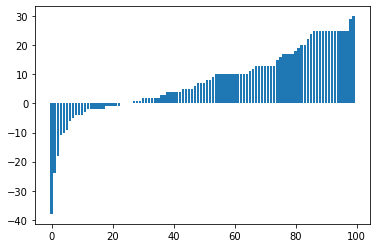

In [ ]:
# mengecek sentimen dengan visualisasi sederhana
y = sorted(sentiments)
x = list(range(len(y)))
print(x)
print(y)

import matplotlib.pyplot as plt
plt.bar(x,y)
plt.show()

# Melihat Emoji

In [ ]:
import re
emojis = []
for tweet in tweets:
    emoji_list = re.findall(r'[^\w\s\|\"\'\`/\-’▪!‼?“”*~+@#&=,]', tweet)
    emojis.extend(emoji_list)

emojis_count = {}
for e in emojis:
    if e in emojis_count:
        emojis_count[e] += 1
    else:
        emojis_count[e] = 1

print('Emoji yang paling sering muncul dan frekuensinya:')
print(sorted(emojis_count.items(), key=lambda x: x[1], reverse=True)[:10])

Emoji yang paling sering muncul dan frekuensinya:
[('🙏', 17), ('😭', 14), ('🥺', 13), ('😄', 12), ('️', 7), ('👋', 6), ('💜', 5), ('❤', 5), ('🤗', 4), ('︎', 4)]


# Analisis

- Nilai sentimen tidak dinormalisasi. 
- Jadi ketika kita ingin melihat rata-rata nilai sentimen atau mediannya, bisa jadi ada bias.
- Oleh karena itu, dilihat visualisasi sederhana nilai sentimen terurut oleh bar chart. 
- Karena pada tweet bertopik `snpmtn`:
   - Memiliki tweet positif : 73/100
   - Rata-rata nilai sentimen : 7.65
   - Median nilai sentimen  : 7
   - Meskipun emoji yang terkesan sedih (😭, 🙏, 🥺) paling sering muncul, emoji yang lebih menyenangkan juga cukup banyak kemunculannya (😄, 👋, 💜, ❤, 🤗). Bisa jadi para user merasa sedih (mungkin tidak lolos snmptn) namun tetap memiliki emosi positif lainnya (mungkin bersemangat, masih ada harapan, dll).
   
   > maka disimpulkan bahwa kebanyakan tweet memiliki sentimen positif dalam membicarakan topik `snmptn` di Twitter.